# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [165]:
import glob
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
# set of libraries useful for pie charts
import matplotlib.pyplot as plt
from collections import Counter

import random

In [329]:
DATA_FOLDER = './Data'# Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [330]:
# Write your answer here

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [331]:
# Write your answer here


## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [332]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

### 1. Describe the type and the value range of each attribute. Indicate and transform the attributes that can be Categorical.

In [154]:
import pandas as pd
import numpy as np 

titanic = pd.read_excel('../../ADA2017-Tutorials-master/02 - Intro to Pandas/Data/titanic.xls', header=0)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [155]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [156]:
#types encountered 
titanic.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [157]:
#value range of each attribute 
value_ranges = [titanic[titanic.columns[i]].unique() for i in range(0,len(titanic.columns)-1)]

In [158]:
# compute min max of each measurable attribute 
min_pclass, max_pclass = [min(titanic['pclass']), max(titanic['pclass'])]
min_survived, max_survived = [min(titanic['survived']), max(titanic['survived'])]
min_age, max_age = [min(titanic['age']), max(titanic['age'])]
min_sibsp, max_sibsp = [min(titanic['sibsp']),max(titanic['sibsp'])]
min_parch, max_parch = [min(titanic['parch']),max(titanic['parch'])]
min_fare, max_fare = [min(titanic['fare']),max(titanic['fare'])]
body = titanic['body']
min_body, max_body = [min(body[~np.isnan(body)]),max(body[~np.isnan(body)])] 
#did not remove the NaN values of the dataframe but did not take them into account in order to retrieve useful data

### Value range of each attribute
||pclass|survived|name|sex|age|sibsp|parch|ticket|fare|cabin|embarked|boat|body|home.dest|
|----------------------------------------------------------------------------------------|
|value range|1-3|0-1|-|male-female|(0.17,80)|(0, 8)|(0, 9)|-|(0.0, 512.32920000000001)|-|(S,C,Q)|-|(1.0, 328.0)|-|
|Categorical|yes|yes|no|yes|no|no|no|no|no|no|yes|no|no|no|

The Categorical attributes are the passengers’ class (which could also be considered as ordinal as travel classes benefit from different types of treatment), wether or not they survived, passengers' sex, and their port of embarkation. 
The attributes for which no value range is assigned in the previous table are presented as alphanumerical data and therefore cannot be classified in a logical and useful manner.

#### Remark:
In order to continue this exercise with a cleaner data set, we will drop the columns that will not be useful (name, ticket, destination, body, fare) along with the rows where some necessary data is missing to get an unbiased data set (NaN in cabin, embarkation port, age, sex, travel class).

In [159]:
titanic.shape

(1309, 14)

In [160]:
cols = ['name', 'ticket', 'fare', 'body', 'home.dest', 'boat']
titanic = titanic.drop(cols, axis=1)

In [161]:
np.count_nonzero(titanic.embarked.isnull())
#np.count_nonzero(titanic.survived.isnull())
#np.count_nonzero(titanic.pclass.isnull())
#np.count_nonzero(titanic.sex.isnull())
#np.count_nonzero(titanic.cabin.isnull())
titanic.embarked[titanic.embarked.isnull()]

168    NaN
284    NaN
Name: embarked, dtype: object

In [166]:
i1 = random.randint(0, 2)
i2 = random.randint(0, 2)
em = ['S','C','Q']
titanic.set_value(168, 'embarked', em[i1])
titanic.set_value(284,'embarked', em[i2])
titanic_nonullcabin = titanic.dropna(axis=0)

In [167]:
titanic.shape

(1309, 8)

In [168]:
#transforming categorical values into category type 
titanic['pclass'] = titanic.pclass.astype('category')
titanic['survived'] = titanic.survived.astype('category')
titanic['sex'] = titanic.sex.astype('category')
titanic['embarked'] = titanic.embarked.astype('category')

### 2. Plot histograms for the travel class, embarkation port, sex and age attributes. For the latter one, use discrete decade intervals.

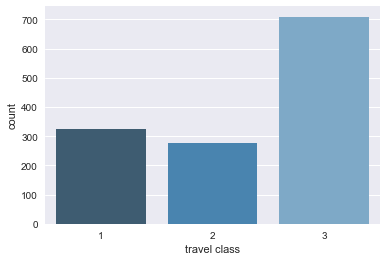

In [169]:
%matplotlib inline
sns.countplot(x="pclass", data=titanic, palette="Blues_d")
plt.xlabel('travel class')

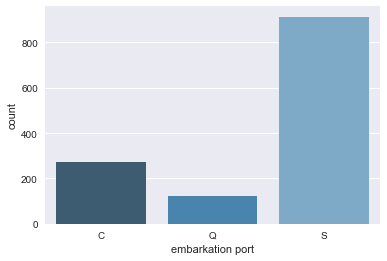

In [170]:
%matplotlib inline
sns.countplot(x="embarked", data=titanic, palette="Blues_d")
plt.xlabel('embarkation port')

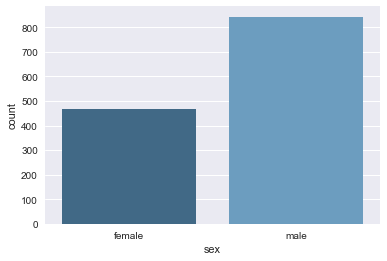

In [171]:
%matplotlib inline
sns.countplot(x="sex", data=titanic, palette="Blues_d")

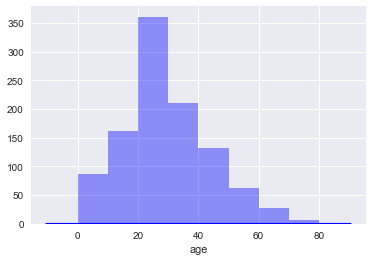

In [172]:
#degueulasse changer type de plot pas sur que ce soit bien classe en discrete decade intervals
%matplotlib inline
ages = titanic['age']
sns.distplot(a=ages[~np.isnan(ages)], bins=8, fit=None, norm_hist =False, hist_kws = {'normed':False}, color='blue')

### 3. Calculate the proportion of passengers by cabin floor. Present your results in a pie chart.

In [173]:
labels = ['A','B','C','D','F','G','E','F','T']
cabins = titanic.cabin
cabins = cabins.astype(str).str[0]

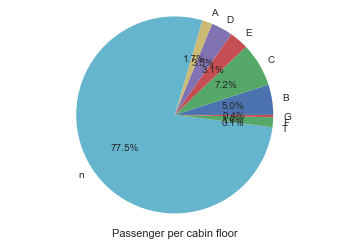

In [174]:
labels, values = zip(*Counter(cabins).items())
plt.pie(values, labels=labels, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.xlabel('Passenger per cabin floor')
plt.show()

### 4. For each travel class, calculate the proportion of the passengers that survived. Present your results in pie charts.

In [175]:
#classes = [titanic['pclass']==i for i in range(min_pclass,max_pclass)]# for i in range(1,3)]
def draw_chart(to_be_counted=None, name=''):
    labels, values = zip(*Counter(to_be_counted).items())
    plt.pie(values, labels=labels, autopct='%1.1f%%', shadow=False)
    plt.axis('equal')
    plt.xlabel(name)
    print(labels)
    print(values)
    plt.show()

(1, 0)
(200, 123)


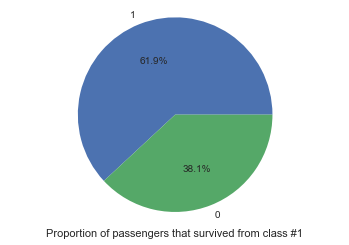

In [176]:
class_1_survivors = (titanic[titanic['pclass']==1]).survived
draw_chart(class_1_survivors, 'Proportion of passengers that survived from class #1')

(0, 1)
(158, 119)


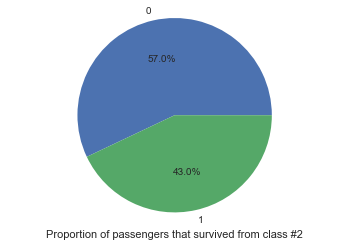

In [177]:
class_2_survivors = (titanic[titanic['pclass']==2]).survived
draw_chart(class_2_survivors, 'Proportion of passengers that survived from class #2')

(0, 1)
(528, 181)


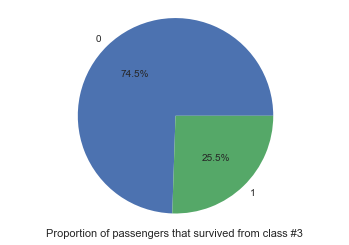

In [178]:
class_3_survivors = (titanic[titanic['pclass']==3]).survived
draw_chart(class_3_survivors, 'Proportion of passengers that survived from class #3')

### 5. Calculate the proportion of the passengers that survived by travel class and sex. Present your results in a single histogram.

In [199]:
proportion_sex = [];
sex = [];
for i in range (0,len(titanic['sex'].cat.categories)):
    survivors = (titanic[titanic['sex'] == titanic['sex'].cat.categories[i]]).survived
    labels, values = zip(*Counter(survivors).items()) 
    sex.append (titanic['sex'].cat.categories[i])
    if labels[0] == 1:
        proportion_sex.append(values[0]/sum(values))
    else:
        proportion_sex.append(values[1]/sum(values))
    
prop_sex = pd.DataFrame({'sex':sex,
                         'proportion':proportion_sex})
prop_sex.head()

,proportion,sex
0,0.727468,female
1,0.190985,male


In [198]:
proportion_pclass = [];
pclass = [];
for i in range (0,len(titanic['pclass'].cat.categories)):
    survivors = (titanic[titanic['pclass'] == titanic['pclass'].cat.categories[i]]).survived
    labels, values = zip(*Counter(survivors).items()) 
    pclass.append(titanic['pclass'].cat.categories[i])
    if labels[0] == 1:
        proportion_pclass.append(values[0]/sum(values))
    else:
        proportion_pclass.append(values[1]/sum(values))
    

prop_pclass = pd.DataFrame({'pclass': pclass,
                            'proportion': proportion_pclass })
prop_pclass.head()

,pclass,proportion
0,1,0.619195
1,2,0.429603
2,3,0.255289


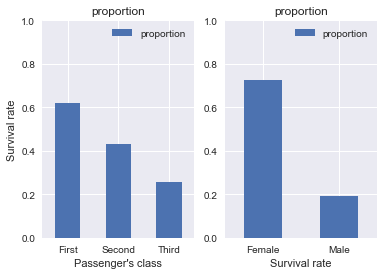

In [200]:
fig, axes = plt.subplots(nrows=1, ncols=2)

fig1 = prop_pclass.plot(x='pclass',y='proportion',kind='bar', subplots= 'True',ax=axes[0], ylim = (0, 1))
fig2 = prop_sex.plot(x='sex',y='proportion',kind='bar', subplots= 'True',ax=axes[1], ylim = (0, 1))
fig.axes[0].set_xlabel( "Passenger's class")
fig.axes[0].set_ylabel( "Survival rate")
fig.axes[1].set_xlabel( "Passenger's sex")
fig.axes[1].set_xlabel( "Survival rate")
fig.axes[0].set_xticklabels(["First","Second","Third"], rotation=0)
fig.axes[1].set_xticklabels(["Female","Male"], rotation=0)